#### **Import the necessary libraries**

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline,Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

#### **Load the dataset**

In [2]:
df = pd.read_excel("Folds5x2_pp.xlsx")

In [3]:
df.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [5]:
df.shape

(9568, 5)

In [6]:
df.columns

Index(['AT', 'V', 'AP', 'RH', 'PE'], dtype='object')

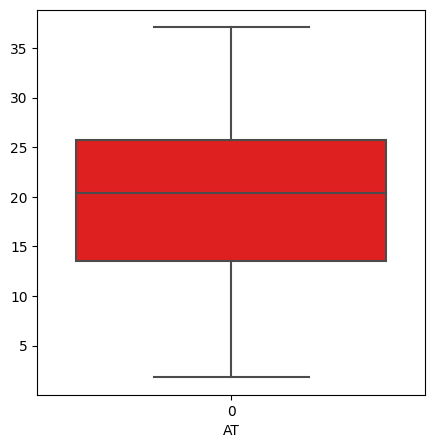

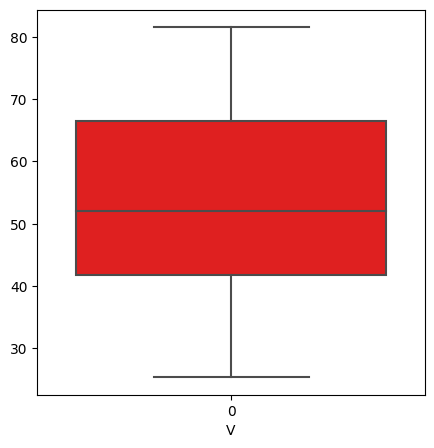

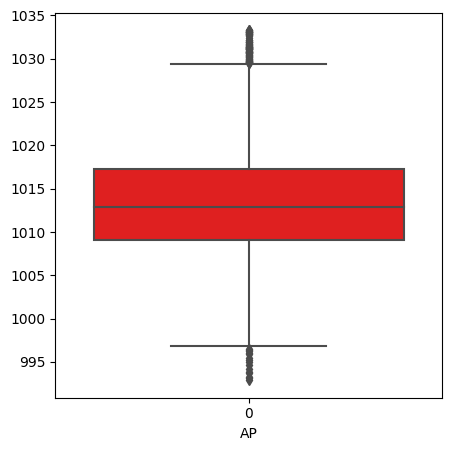

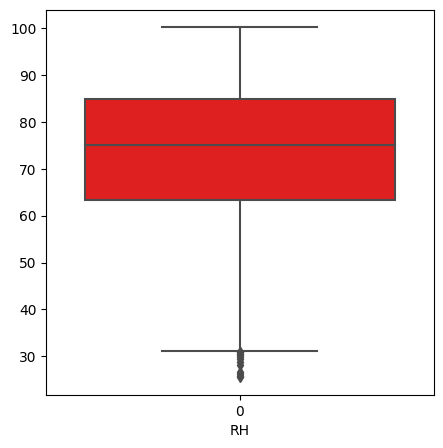

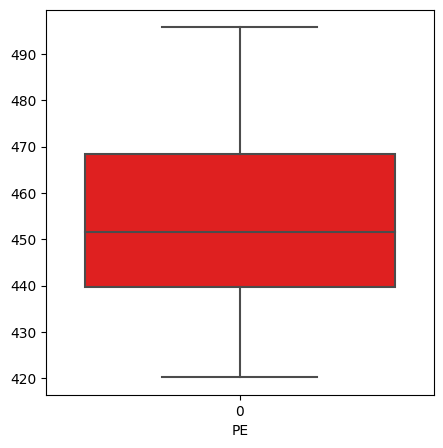

In [7]:
# box plot to detect outlier in dataset
for i in df.columns:
    plt.figure(figsize=(5,5))
    sns.boxplot(data=df[i],color='r')
    plt.xlabel(str(i))
    plt.show()

In [8]:
#outlier treatment
def outlier_treat(x):
    q1 = x.quantile(0.25)
    q3 = x.quantile(0.75)
    iqr = q3 - q1
    lc_iqr = q1 - 1.5 * iqr
    uc_iqr = q3 + 1.5 * iqr
    x = x.clip(lower = lc_iqr, upper= uc_iqr )
    return x
df = df.apply(outlier_treat)

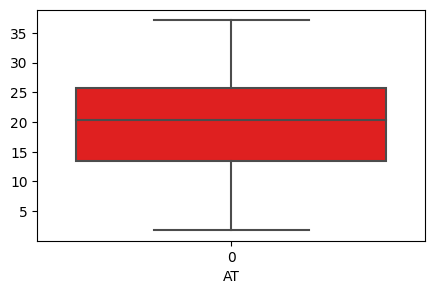

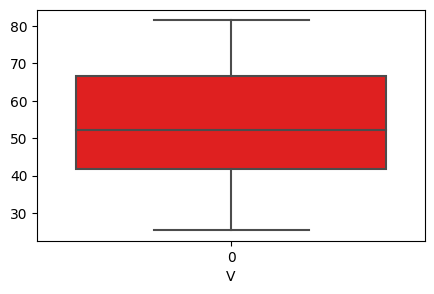

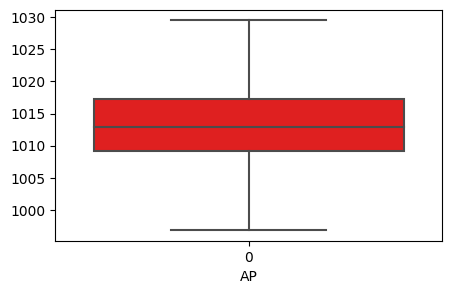

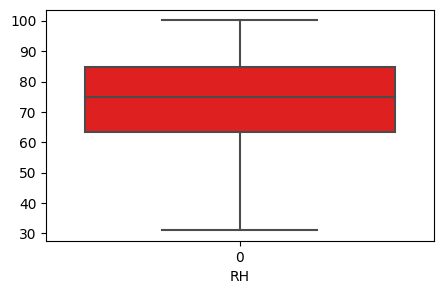

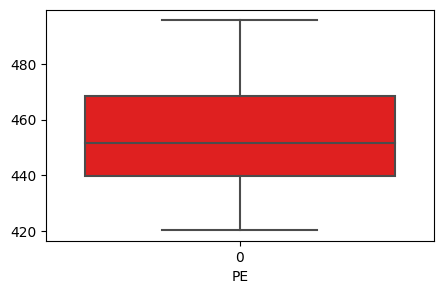

In [9]:
# box plot to detect outlier in dataset
for i in df.columns:
    plt.figure(figsize=(5,3))
    sns.boxplot(data=df[i],color='r')
    plt.xlabel(str(i))
    plt.show()

#### **Split the data into features and target variable**

In [10]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

#### **Split the data into training and testing sets**

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

#### **Create a pipeline to preprocess the data**

In [12]:
preprocessing_pipeline = make_pipeline(StandardScaler())

# Create an instance of the regression algorithm
regressor =  LinearRegression()

# Combine the preprocessing pipeline and the regression algorithm
pipeline = make_pipeline(preprocessing_pipeline, regressor)

#### **Train the model using the training data**

In [13]:
pipeline.fit(X_train, y_train) 

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('standardscaler', StandardScaler())])),
                ('linearregression', LinearRegression())])

#### **Make predictions on the testing data**

In [14]:
y_pred = pipeline.predict(X_test)

#### **Evaluate the model's performance using the mean squared error and R-squared metrics**

In [15]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean squared error:", mse)
print("R-squared:", r2)

Mean squared error: 20.575767625562264
R-squared: 0.9292153520678215


#### **Visualize the actual and predicted values**

<Figure size 1000x500 with 0 Axes>

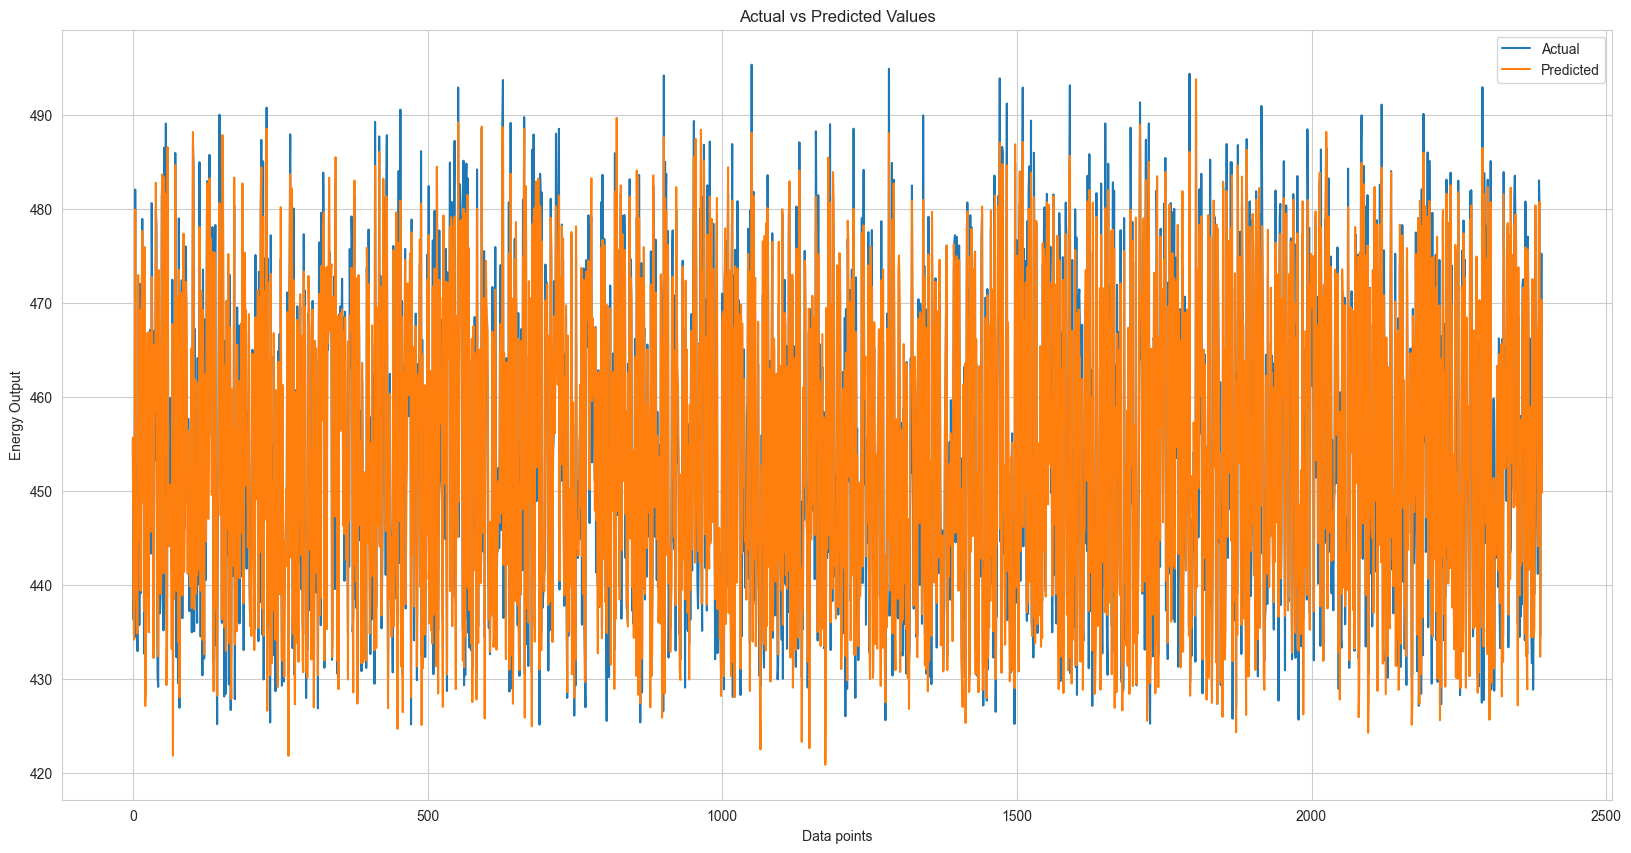

In [16]:
plt.figure(figsize=(10, 5))
sns.set_style("whitegrid")
plt.figure(figsize=(20,10))
plt.plot(y_test.values, label="Actual")
plt.plot(y_pred, label="Predicted")
plt.xlabel("Data points")
plt.ylabel("Energy Output")
plt.title("Actual vs Predicted Values")
plt.legend()
plt.show()

In [17]:
df1 = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_pred})
df1.head()

,Real Values,Predicted Values
2513,455.27,455.660059
9411,436.31,438.721187
8745,440.68,434.150047
9085,434.40,438.757417
4950,482.06,479.920597


#### **Create an instance of the regression algorithm**

In [18]:
models = {'LinearRegression' :  LinearRegression(),
          'RandomForestRegressor' :  RandomForestRegressor(),
          'SVR' :  SVR(),
          'Lassoregressor' :  Lasso(),
          'Ridge' :  Ridge()}
reg_results = {}
reg_predict = {}

#### **Combine the preprocessing pipeline and the regression algorithm**

In [19]:
for model_name, model in models.items():
# Combine the preprocessing pipeline and the regression algorithm
    pipeline = Pipeline(steps=[("preprocessor", preprocessing_pipeline), 
                                     ("model", model)])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    print(f"Scoring {model_name}...")
    reg_predict[model_name] = y_pred
    reg_results[model_name] = r2_score(y_test, y_pred)
        

Scoring LinearRegression...
Scoring RandomForestRegressor...
Scoring SVR...
Scoring Lassoregressor...
Scoring Ridge...


In [20]:
y_test = np.array(y_test)

In [21]:
reg_predict = pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in reg_predict.items() ]))
abc = pd.DataFrame({'Real Values':y_test})
final = abc.join(reg_predict)

In [22]:
final.head()

,Real Values,LinearRegression,RandomForestRegressor,SVR,Lassoregressor,Ridge
0,455.27,455.660059,455.1300,455.674979,456.189616,455.664474
1,436.31,438.721187,435.6122,436.715928,436.242464,438.717430
2,440.68,434.150047,434.6043,434.037112,436.989961,434.153882
3,434.40,438.757417,434.9815,436.456318,435.636090,438.752891
4,482.06,479.920597,479.1964,479.670314,475.953386,479.914733


#### **Visualize the actual and predicted values**

<Figure size 1000x500 with 0 Axes>

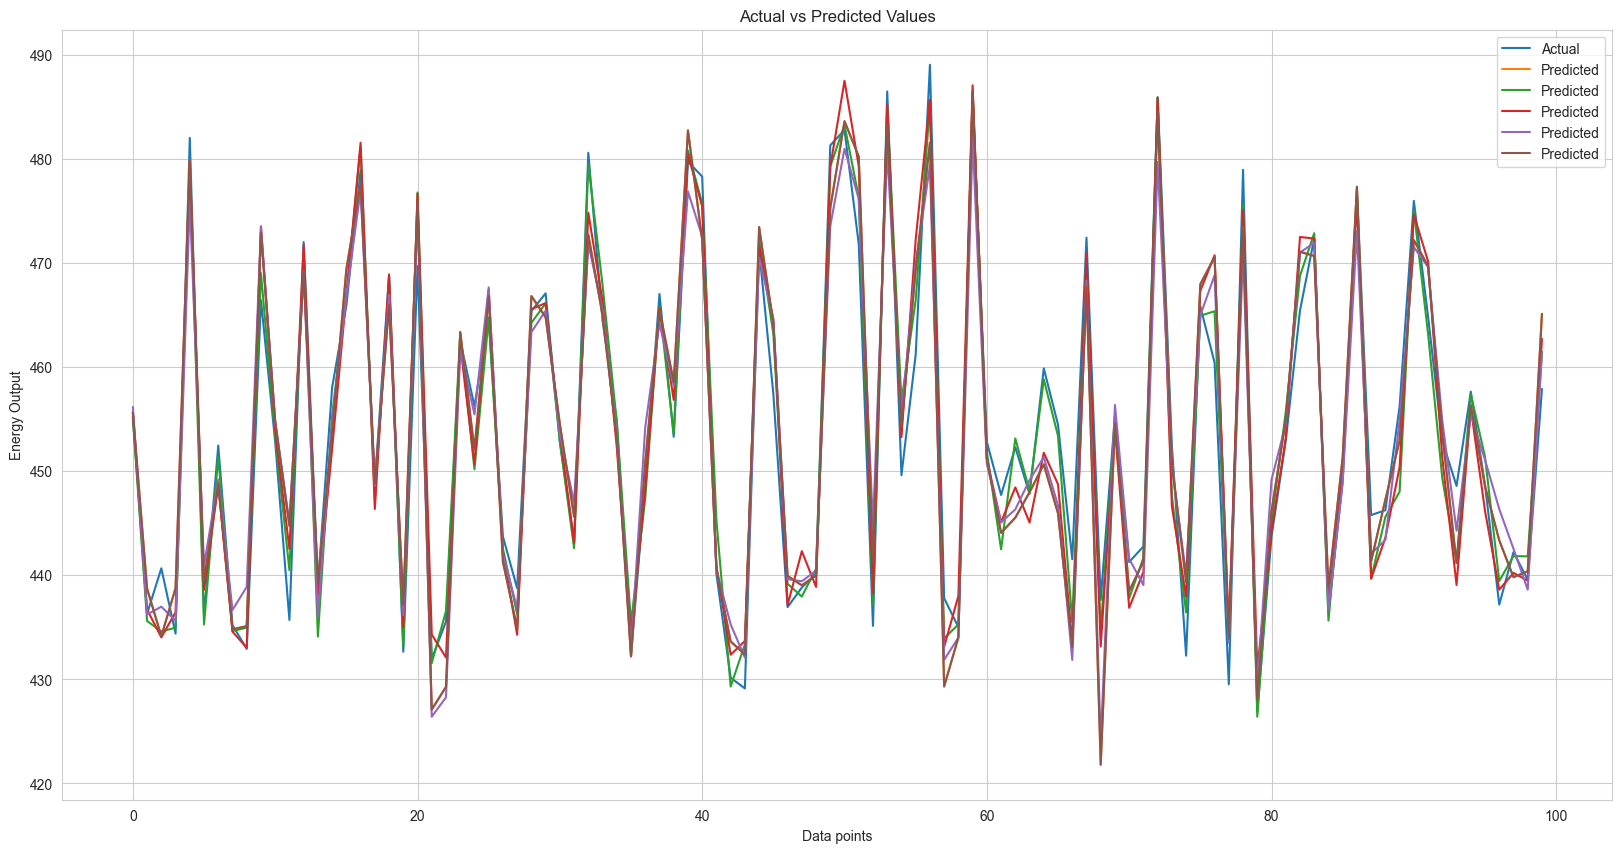

In [23]:
plt.figure(figsize=(10, 5))
sns.set_style("whitegrid")
plt.figure(figsize=(20,10))
final_cut = final.iloc[:100,:]
plt.plot(final_cut['Real Values'], label="Actual")
plt.plot(final_cut.drop(columns=['Real Values']), label="Predicted")
plt.xlabel("Data points")
plt.ylabel("Energy Output")
plt.title("Actual vs Predicted Values")
plt.legend()
plt.show()

In [24]:
reg_results = pd.DataFrame({'Model_Name':reg_results.keys(), 'reg_result': reg_results.values()})

In [25]:
reg_results

,Model_Name,reg_result
0,LinearRegression,0.929215
1,RandomForestRegressor,0.962019
2,SVR,0.940413
3,Lassoregressor,0.914920
4,Ridge,0.929222
